In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
cmp = ListedColormap([[0,0,0,0], [1,0,0,1]])
from IPython.display import clear_output

# Indipendenza condizionale dei risultati

## Test ripetuti su precedenti positivi e negativi

Sensibilità e specificità sono la produttoria di sensibilità e specificità di tutti gli $n$ test effettuati come eventi indipendenti

$$
\mathbf{SE}_n = P(\oplus|M)_n = \bigcap_{i=1}^{n} P(\oplus|M)_i = \prod_{i=1}^{n} \mathbf{SE} = \mathbf{SE}^n
$$

$$
\mathbf{SP}_n = P(\ominus|\overline{M})_n = \bigcap_{i=1}^{n} P(\ominus|\overline{M})_i = \prod_{i=1}^{n} \mathbf{SP} = \mathbf{SP}^n
$$

## Test ripetuti solo su precedenti positivi

La sensibilità è la produttoria delle sensibilità di tutti gli $n$ test effettuati come come eventi indipendenti.

La specificità è la specificità primo test pari ad $\mathbf{SP}$ più la sommatoria dei successivi eventi $\overline{P(\ominus|\overline{M})}_{i-1} \cap P(\ominus|\overline{M})_i$ perché si esclude la possibilità che i precedenti test fossero negativi.

$$
\mathbf{SE}_n = P(\oplus|M)_n = \bigcap_{i=1}^{n} P(\oplus|M) = \prod_{i=1}^{n} \mathbf{SE}
= \mathbf{SE}^n
$$

$$
\mathbf{SP}_n 
= P(\ominus|\overline{M})_1 + \bigcup_{i=2}^{n}
\Bigg( \overline{P(\ominus|\overline{M})}_{i-1} \cap P(\ominus|\overline{M})_i \Bigg) 
= \mathbf{SP} + \sum_{i=2}^{n}
\Bigg( \big( 1 - \mathbf{SP}_{i-1} \big) \cdot \mathbf{SP} \Bigg)
$$

## Test ripetuti solo su precedenti negativi

La specificità è la produttoria delle specificità di tutti gli $n$ test effettuati come come eventi indipendenti.

La sensibilità è la sensibilità del primo test pari ad $\mathbf{SE}$ più la sommatoria dei successivi eventi  $\overline{P(\oplus|M)}_{i-1} \cap P(\oplus|M)_i$ perché si esclude la possibilità che i precedenti test fossero positivi.

$$
\mathbf{SE}_n = P(\oplus|M)_1 + \bigcup_{i=2}^{n} 
\Bigg( \overline{P(\oplus|M)}_{i-1} \cap P(\oplus|M)_i \Bigg) =
\mathbf{SE} + \sum_{i=2}^{n} 
\Bigg( \big( 1 - \mathbf{SE}_{i-1} \big) \cdot \mathbf{SE} \Bigg)
$$

$$
\mathbf{SP}_n = P(\ominus|\overline{M})_n = \bigcap_{i=1}^{n} P(\ominus|\overline{M}) = \prod_{i=1}^{n} \mathbf{SP}
= \mathbf{SP}^n
$$

----------------------------------- TEST numero 1
SP: 0.82000000   falsi-: 0.18000000
SE: 0.95000000   falsi+: 0.05000000
----------------------------------- TEST numero 2
SP: 0.67240000   falsi-: 0.32760000
SE: 0.99750000   falsi+: 0.00250000
----------------------------------- TEST numero 3
SP: 0.55136800   falsi-: 0.44863200
SE: 0.99987500   falsi+: 0.00012500
----------------------------------- TEST numero 4
SP: 0.45212176   falsi-: 0.54787824
SE: 0.99999375   falsi+: 0.00000625
----------------------------------- TEST numero 5
SP: 0.37073984   falsi-: 0.62926016
SE: 0.99999969   falsi+: 0.00000031
----------------------------------- TEST numero 6
SP: 0.30400667   falsi-: 0.69599333
SE: 0.99999998   falsi+: 0.00000002
----------------------------------- TEST numero 7
SP: 0.24928547   falsi-: 0.75071453
SE: 1.00000000   falsi+: 0.00000000
----------------------------------- TEST numero 8
SP: 0.20441409   falsi-: 0.79558591
SE: 1.00000000   falsi+: 0.00000000
------------------------

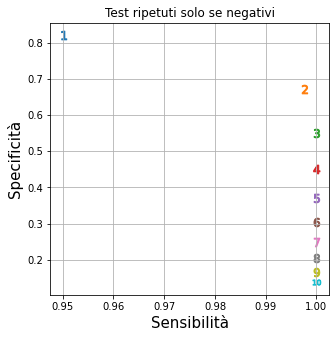

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Test ripetuti solo se negativi")
ax.set_xlabel("Sensibilità", fontsize=15)
ax.set_ylabel("Specificità", fontsize=15)
ax.grid()

SE = .95
SP = .82
n = 10

print(f"----------------------------------- TEST numero 1")
print(f"SP: {SP:.8f}   falsi-: {1-SP:.8f}")
print(f"SE: {SE:.8f}   falsi+: {1-SE:.8f}")
ax.scatter(SE, SP, marker="$1$", s=75)

SEn = SE
se_pre = SE
sp = SP
for i in range(n-1):
    SEn += (1 - se_pre) * SE
    se_pre = SEn
    SPn = SP ** (i+2)
    ax.scatter(SEn, SPn, marker=f"${i+2}$", s=75)
    print(f"----------------------------------- TEST numero {i+2}")
    print(f"SP: {SPn:.8f}   falsi-: {1-SPn:.8f}")
    print(f"SE: {SEn:.8f}   falsi+: {1-SEn:.8f}")

----------------------------------- TEST numero 1
SP: 0.95000000   falsi-: 0.05000000
SE: 0.95000000   falsi+: 0.05000000
----------------------------------- TEST numero 2
SP: 0.90250000   falsi-: 0.09750000
SE: 0.99750000   falsi+: 0.00250000
----------------------------------- TEST numero 3
SP: 0.85737500   falsi-: 0.14262500
SE: 0.99987500   falsi+: 0.00012500
----------------------------------- TEST numero 4
SP: 0.81450625   falsi-: 0.18549375
SE: 0.99999375   falsi+: 0.00000625
----------------------------------- TEST numero 5
SP: 0.77378094   falsi-: 0.22621906
SE: 0.99999969   falsi+: 0.00000031
----------------------------------- TEST numero 6
SP: 0.73509189   falsi-: 0.26490811
SE: 0.99999998   falsi+: 0.00000002
----------------------------------- TEST numero 7
SP: 0.69833730   falsi-: 0.30166270
SE: 1.00000000   falsi+: 0.00000000
----------------------------------- TEST numero 8
SP: 0.66342043   falsi-: 0.33657957
SE: 1.00000000   falsi+: 0.00000000
------------------------

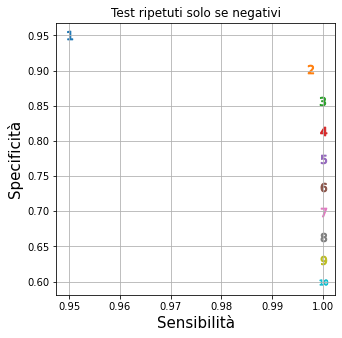

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Test ripetuti solo se negativi")
ax.set_xlabel("Sensibilità", fontsize=15)
ax.set_ylabel("Specificità", fontsize=15)
ax.grid()

SE = .95
SP = .95
n = 10

print(f"----------------------------------- TEST numero 1")
print(f"SP: {SP:.8f}   falsi-: {1-SP:.8f}")
print(f"SE: {SE:.8f}   falsi+: {1-SE:.8f}")
ax.scatter(SE, SP, marker="$1$", s=75)

SEn = SE
se_pre = SE
sp = SP
for i in range(n-1):
    SEn += (1 - se_pre) * SE
    se_pre = SEn
    SPn = SP ** (i+2)
    ax.scatter(SEn, SPn, marker=f"${i+2}$", s=75)
    print(f"----------------------------------- TEST numero {i+2}")
    print(f"SP: {SPn:.8f}   falsi-: {1-SPn:.8f}")
    print(f"SE: {SEn:.8f}   falsi+: {1-SEn:.8f}")

----------------------------------- TEST numero 1
SP: 0.95000000   falsi-: 0.05000000
SE: 0.70000000   falsi+: 0.30000000
----------------------------------- TEST numero 2
SP: 0.90250000   falsi-: 0.09750000
SE: 0.91000000   falsi+: 0.09000000
----------------------------------- TEST numero 3
SP: 0.85737500   falsi-: 0.14262500
SE: 0.97300000   falsi+: 0.02700000
----------------------------------- TEST numero 4
SP: 0.81450625   falsi-: 0.18549375
SE: 0.99190000   falsi+: 0.00810000
----------------------------------- TEST numero 5
SP: 0.77378094   falsi-: 0.22621906
SE: 0.99757000   falsi+: 0.00243000
----------------------------------- TEST numero 6
SP: 0.73509189   falsi-: 0.26490811
SE: 0.99927100   falsi+: 0.00072900
----------------------------------- TEST numero 7
SP: 0.69833730   falsi-: 0.30166270
SE: 0.99978130   falsi+: 0.00021870
----------------------------------- TEST numero 8
SP: 0.66342043   falsi-: 0.33657957
SE: 0.99993439   falsi+: 0.00006561
------------------------

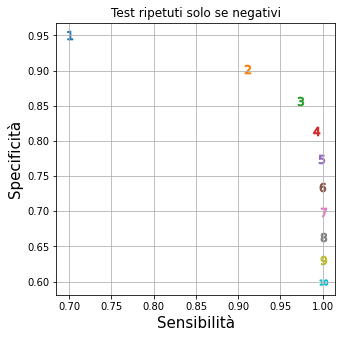

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Test ripetuti solo se negativi")
ax.set_xlabel("Sensibilità", fontsize=15)
ax.set_ylabel("Specificità", fontsize=15)
ax.grid()

SE = .7
SP = .95
n = 10

print(f"----------------------------------- TEST numero 1")
print(f"SP: {SP:.8f}   falsi-: {1-SP:.8f}")
print(f"SE: {SE:.8f}   falsi+: {1-SE:.8f}")
ax.scatter(SE, SP, marker="$1$", s=75)

SEn = SE
se_pre = SE
sp = SP
for i in range(n-1):
    SEn += (1 - se_pre) * SE
    se_pre = SEn
    SPn = SP ** (i+2)
    ax.scatter(SEn, SPn, marker=f"${i+2}$", s=75)
    print(f"----------------------------------- TEST numero {i+2}")
    print(f"SP: {SPn:.8f}   falsi-: {1-SPn:.8f}")
    print(f"SE: {SEn:.8f}   falsi+: {1-SEn:.8f}")

In [81]:
PM1 = .13                      # P(M)   prevalenza
PpM = np.linspace(0, 1, 1001)  # P(+|M) sensibilità
PnS = np.linspace(0, 1, 1001)  # P(-|S) specificità

ticks = np.arange(0, 1001, 100)
tickL = [i/10 for i in range(11)]

In [3]:
# P(+1) probabilità a priori del primo test positivo
Pp1 = PpM*PM1 + (1 - PnS[:, None])*(1 - PM1)

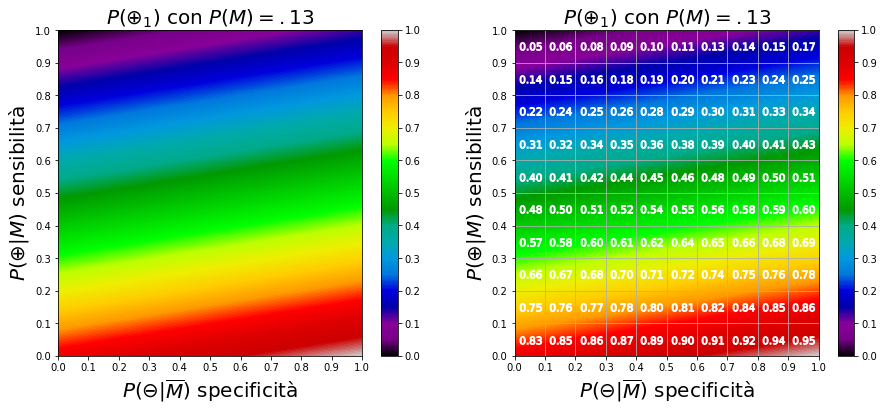

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

im0 = ax[0].pcolormesh(Pp1, cmap="nipy_spectral", vmin=0, vmax=1)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tickL)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(tickL)
plt.colorbar(im0, ax=ax[0], ticks=tickL)
ax[0].set_title("$P(\oplus_1)$ con $P(M)=.13$", fontsize=20)
ax[0].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[0].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)

im1 = ax[1].pcolormesh(Pp1, cmap="nipy_spectral", vmin=0, vmax=1)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tickL)
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(tickL)
for spec in np.arange(.05, .96, .10):
    for sens in np.arange(.05, .96, .10):
        ax[1].scatter(
            spec*1000, sens*1000,
            marker=f"${spec*PM1 + (1-sens)*(1-PM1):.2f}$", s=500, c="w"
        )
plt.colorbar(im1, ax=ax[1], ticks=tickL)
ax[1].set_title("$P(\oplus_1)$ con $P(M)=.13$", fontsize=20)
ax[1].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[1].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[1].grid()
plt.show();

In [5]:
# P(M|+1) probabilità di malattia a posteriori dato il primo test positivo
PM2 = np.nan_to_num(PpM * PM1 / Pp1)
clear_output()

In [6]:
# P(+2) probabilità a priori del secondo test positivo
Pp2 = PpM*PM2 + (1-PnS[:, None])*(1-PM2)

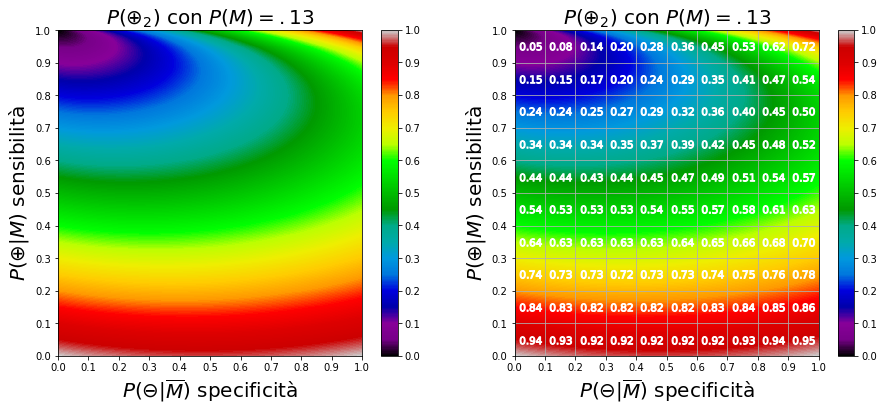

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

im0 = ax[0].pcolormesh(Pp2, cmap="nipy_spectral", vmin=0, vmax=1)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tickL)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(tickL)
ax[0].set_title("$P(\oplus_2)$ con $P(M)=.13$", fontsize=20)
ax[0].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[0].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
plt.colorbar(im0, ax=ax[0], ticks=tickL)

im1 = ax[1].pcolormesh(Pp2, cmap="nipy_spectral", vmin=0, vmax=1)
for spec in np.arange(.05, .96, .10):
    for sens in np.arange(.05, .96, .10):
        pm2 = np.nan_to_num(spec * PM1 / (spec*PM1 + (1-sens)*(1-PM1)))
        ax[1].scatter(
            spec*1000, sens*1000,
            marker=f"${spec*pm2 + (1-sens)*(1-pm2):.2f}$", s=500, c="w"
        )
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tickL)
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(tickL)
ax[1].set_title("$P(\oplus_2)$ con $P(M)=.13$", fontsize=20)
ax[1].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[1].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
plt.colorbar(im1, ax=ax[1], ticks=tickL)
ax[1].grid()

plt.show();

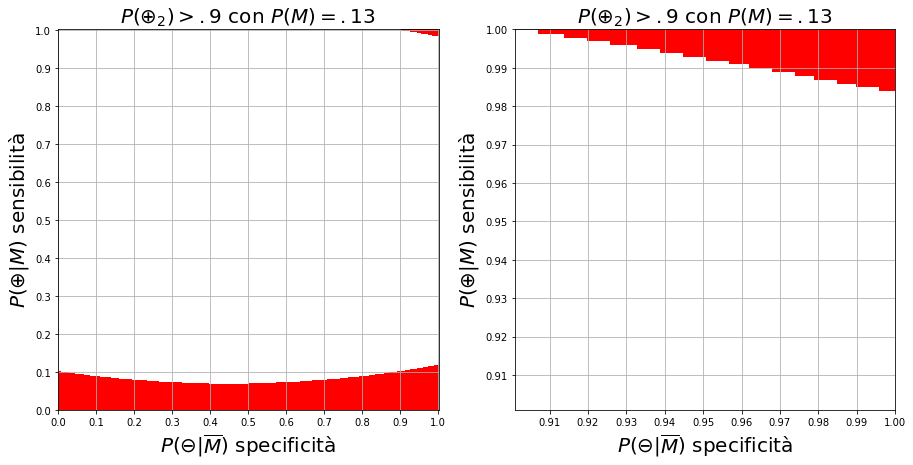

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pcolormesh(Pp2 > .9, cmap=cmp)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tickL)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(tickL)
ax[0].set_title("$P(\oplus_2)>.9$ con $P(M)=.13$", fontsize=20)
ax[0].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[0].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[0].grid()

ax[1].pcolormesh(Pp2 > .9, cmap=cmp)
ax[1].set_xticks(np.arange(900, 1001, 10))
ax[1].set_xticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_yticks(np.arange(900, 1001, 10))
ax[1].set_yticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_xlim(.9*1001, 1000)
ax[1].set_ylim(.9*1001, 1000)
ax[1].set_title("$P(\oplus_2)>.9$ con $P(M)=.13$", fontsize=20)
ax[1].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[1].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[1].grid()

plt.show();

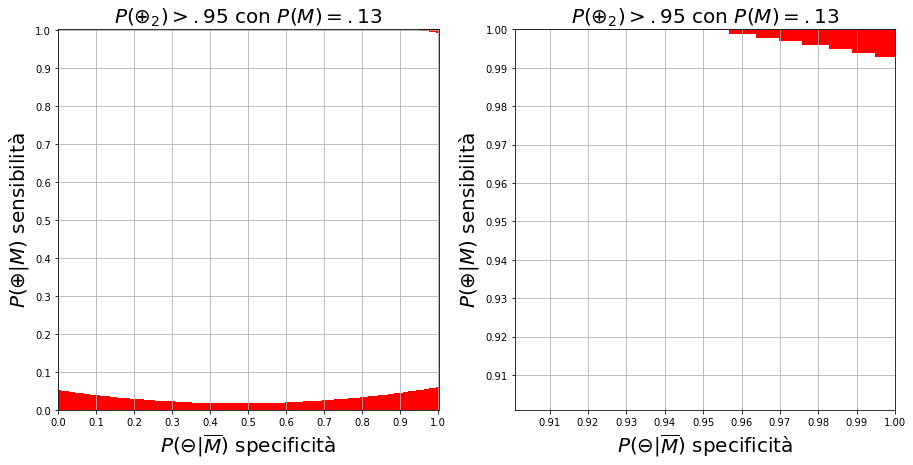

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pcolormesh(Pp2 > .95, cmap=cmp)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tickL)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(tickL)
ax[0].set_title("$P(\oplus_2)>.95$ con $P(M)=.13$", fontsize=20)
ax[0].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[0].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[0].grid()

ax[1].pcolormesh(Pp2 > .95, cmap=cmp)
ax[1].set_xticks(np.arange(900, 1001, 10))
ax[1].set_xticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_yticks(np.arange(900, 1001, 10))
ax[1].set_yticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_xlim(.9*1001, 1000)
ax[1].set_ylim(.9*1001, 1000)
ax[1].set_title("$P(\oplus_2)>.95$ con $P(M)=.13$", fontsize=20)
ax[1].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[1].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[1].grid()

plt.show();

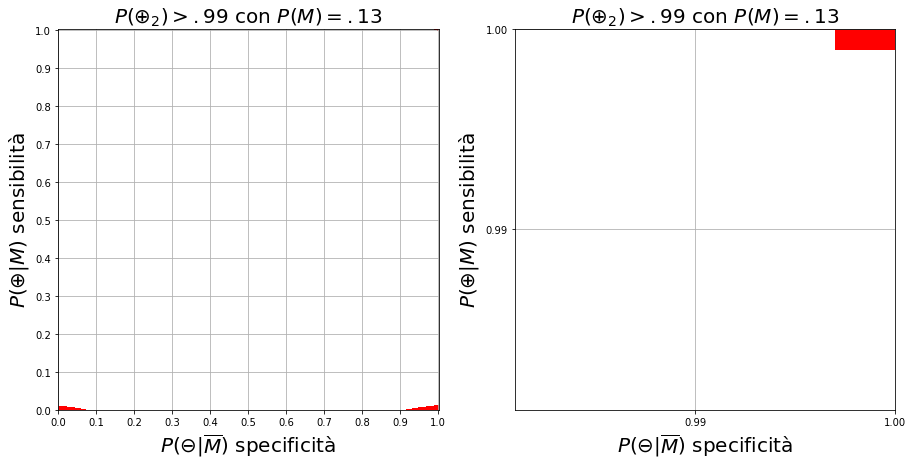

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pcolormesh(Pp2 > .99, cmap=cmp)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tickL)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(tickL)
ax[0].set_title("$P(\oplus_2)>.99$ con $P(M)=.13$", fontsize=20)
ax[0].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[0].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[0].grid()

ax[1].pcolormesh(Pp2 > .99, cmap=cmp)
ax[1].set_xticks(np.arange(900, 1001, 10))
ax[1].set_xticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_yticks(np.arange(900, 1001, 10))
ax[1].set_yticklabels([f"{.9+i/100:.2f}" for i in range(11)])
ax[1].set_xlim(.98*1001, 1000)
ax[1].set_ylim(.98*1001, 1000)
ax[1].set_title("$P(\oplus_2)>.99$ con $P(M)=.13$", fontsize=20)
ax[1].set_ylabel("$P(\oplus|M)$ sensibilità", fontsize=20)
ax[1].set_xlabel("$P(\ominus|\overline{M})$ specificità", fontsize=20)
ax[1].grid()

plt.show();

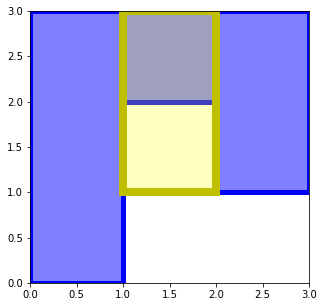

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))
Bmap = ListedColormap([
    [0, 0, 0, 0],
    [0, 0, 1, .5],
    [1, 1, 0, .5],
    [0, 1, 0, .5]
])
B = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])
ax.pcolormesh(B, cmap=Bmap, vmin=0, vmax=3)

poly = patches.Polygon(np.array([
    [0, 0],
    [0, 3],
    [3, 3],
    [3, 1],
    [2, 1],
    [2, 2],
    [1, 2],
    [1, 0],
    [0, 0],
]), ec='b', lw=5, facecolor=(0, 0, 1, .5))
ax.add_patch(poly)
rect = patches.Rectangle((1,1),1,2, ec='y', lw=8, facecolor=(1, 1, 0, .25))
ax.add_patch(rect)

#ax.grid();

$P(x) = 1/9$

$P(Y) = 2/9$

$P(\overline{B}) = 3/9 = 1/3$

$P(Y|B) = \frac{P(B|Y)P(Y)}{P(B)} = \frac{1}{2} \frac{2}{9} \frac{3}{2} = \frac{1}{6}$